In [43]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [44]:
houses = pd.read_csv("data.csv")

In [45]:
houses.head()

,no,date,age,dist_mrt,n_stores,lat,lon,price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [46]:
houses_train, houses_test = train_test_split(houses, test_size = 0.3)

In [47]:
houses_train.shape

(289, 8)

In [48]:
houses_test.shape

(125, 8)

In [49]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(houses_train.iloc[:,:-1], houses_train.iloc[:,-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
train_pred = regr.predict(houses_train.iloc[:,:-1])

In [51]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-6.89463752e-03  3.69091450e+00 -2.75166602e-01 -3.85510225e-03
  1.08423969e+00  2.53237716e+02  1.50927572e+01]


In [52]:
print('Variance score: %.2f' % (r2_score(train_pred, houses_train.iloc[:,-1])))

Variance score: 0.45


In [53]:
test_pred = regr.predict(houses_test.iloc[:,:-1])
print('Variance score: %.2f' % (r2_score(test_pred, houses_test.iloc[:,-1])))

Variance score: -0.42


In [54]:
### USING STATSMODEL

In [58]:
import statsmodels.api as sm

In [59]:
features = ['date', 'age', 'dist_mrt', 'n_stores', 'lat', 'lon']

houses_train_X = houses_train.loc[:,features]
houses_train_y = houses_train.loc[:, 'price']

houses_test_X = houses_test.loc[:,features]
houses_test_y = houses_test.loc[:, 'price']

houses_train_X = sm.add_constant(houses_train_X)
houses_test_X = sm.add_constant(houses_test_X)

c:\users\fmsay\miniconda3\envs\pythondata\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
model = sm.OLS(houses_train_y, houses_train_X)
results = model.fit()

In [61]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     84.75
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.22e-60
Time:                        18:46:03   Log-Likelihood:                -1002.9
No. Observations:                 289   AIC:                             2020.
Df Residuals:                     282   BIC:                             2046.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.659e+04   6852.036     -2.421      0.0

In [62]:
#houses_train_X

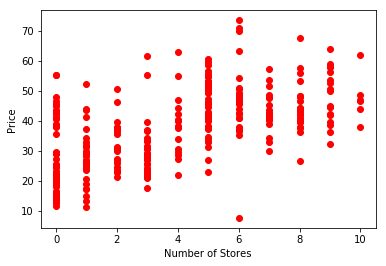

In [63]:
plt.plot(houses_train_X.n_stores, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Number of Stores')
plt.show()

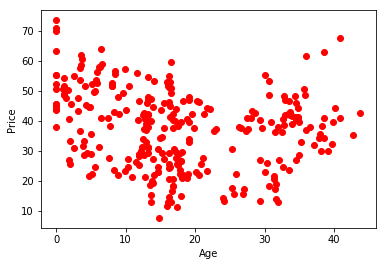

In [64]:
plt.plot(houses_train_X.age, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Age')
plt.show()

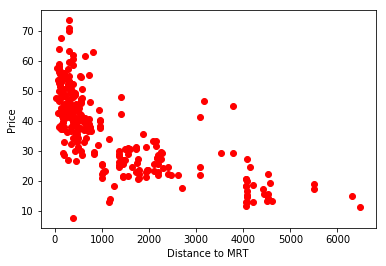

In [65]:
plt.plot(houses_train_X.dist_mrt, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Distance to MRT')
plt.show()

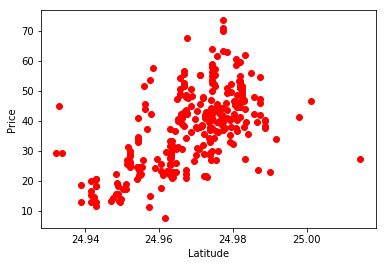

In [66]:
plt.plot(houses_train_X.lat, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Latitude')
plt.show()

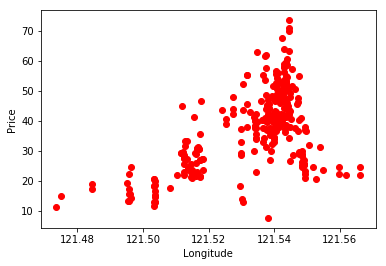

In [67]:
plt.plot(houses_train_X.lon, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Longitude')
plt.show()

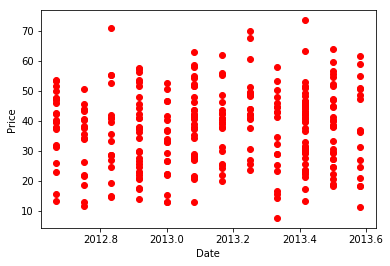

In [68]:
plt.plot(houses_train_X.date, houses_train_y, 'ro')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [69]:
print("Average price")
houses_train_y.mean()

Average price


37.44325259515571

In [70]:
train_pred = results.predict(houses_train_X)
# Use the model on test data
test_pred = results.predict(houses_test_X)

In [72]:
print("Training R2", r2_score(houses_train_y, train_pred) )
print("Test R2", r2_score(houses_test_y, test_pred) )

Training R2 0.6432654122376927
Test R2 0.46302631587224186


In [75]:
# Remove Longitude

features2 = ['date', 'age', 'dist_mrt', 'n_stores', 'lat']

houses_train_X2 = houses_train.loc[:,features2]
houses_train_y2 = houses_train.loc[:, 'price']

houses_test_X2 = houses_test.loc[:,features2]
houses_test_y2 = houses_test.loc[:, 'price']

houses_train_X2 = sm.add_constant(houses_train_X2)
houses_test_X2 = sm.add_constant(houses_test_X2)

In [76]:
model2 = sm.OLS(houses_train_y2, houses_train_X2)
results2 = model2.fit()

In [77]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     102.0
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.25e-61
Time:                        18:46:32   Log-Likelihood:                -1003.0
No. Observations:                 289   AIC:                             2018.
Df Residuals:                     283   BIC:                             2040.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.432e+04   3420.971     -4.187      0.0

In [78]:
train_pred2 = results2.predict(houses_train_X2)
# Use the model on test data
test_pred2 = results2.predict(houses_test_X2)

In [79]:
print("Training R2 - second model", r2_score(houses_train_y, train_pred2) )
print("Test R2 - second model", r2_score(houses_test_y, test_pred2) )

Training R2 - second model 0.6430804675264125
Test R2 - second model 0.46433514125883224


In [80]:
# Statsmodels examples